## Hardware timestamps for switch forwarding latency
Objective: use NIC timestamps to measure latency introduced
by switch forwarding. Setup

```
Host1-NIC -- switch1 -- switch2 -- switchN -- Host2-NIC
```

The corresponding code is in `no-bypass/hwts.cpp`. We extract timestamps from the
NIC and measure latency with the usual ping pong method. Since the timestamps
are in hardware, we should observe only wire + switch forwarding + (possibly)
NIC processing delays.

The benchmarks outputs client and server timestamps separately because timestamps
need to be fetched from the NICs after they are sent. Timestamps are formatted
as

```
send_timestamp1 recv_timestamp1
send_timestamp2 recv_timestamp2
...
send_timestampN recv_timestampN
```


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib widget

In [8]:
USR = 'dvr0'
CLIENT = 'swystems.xdp1'
SERVER = 'swystems.xdp2'

!scp $USR@$CLIENT:/users/$USR/det-bypass/build/no-bypass/client.out .
!scp $USR@$SERVER:/users/$USR/det-bypass/build/no-bypass/server.out .


client.out                                    100% 3906KB 794.7KB/s   00:04    
server.out                                    100% 3906KB 828.6KB/s   00:04    


In [9]:
'''
Import data from output files, generate and store timestamps array
'''
client_data = np.fromfile('client.out', sep=" ", dtype=int)
client_arr = np.reshape(client_data, (len(client_data) // 2, 2))
server_data = np.fromfile('server.out', sep=" ", dtype=int)
server_arr = np.reshape(server_data, (len(server_data) // 2, 2))

lat = client_arr[:,1]-client_arr[:,0] - (server_arr[:,0] - server_arr[:,1])

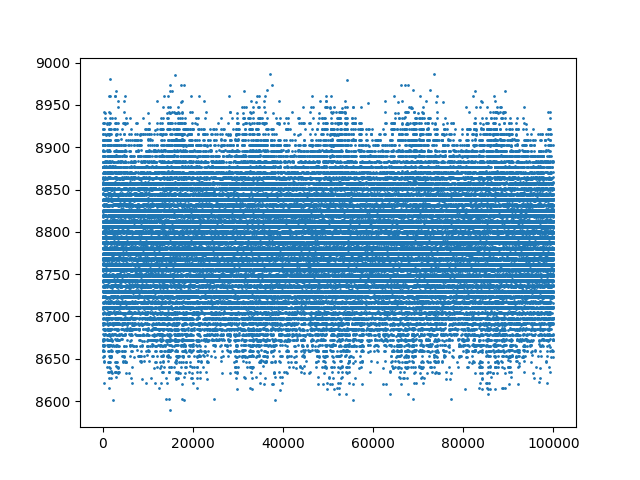

In [10]:
lat = lat[1:-2]
x = np.arange(len(lat))
fig,ax = plt.subplots(1,1)
ax.scatter(x,lat,s=1)

In [5]:
lat[59470]
client_arr[59470]

array([1720888418560908221, 1720888418560943306])

In [27]:
1720454135160522931- 1720454135159902906

620025

In [29]:
1720454135607907399-1720454135607293998

613401

In [7]:
'''
Save processed data as numpy array
'''
date = datetime.datetime.now() 
np.save(date.strftime("processed-data/1switch/lat_%H%M_%d%m%y"),lat)

## plot and load


In [5]:
filename = 'lat_load90_1716_080724'
latloaded = np.load(f'processed-data/4switches/{filename}.npy')

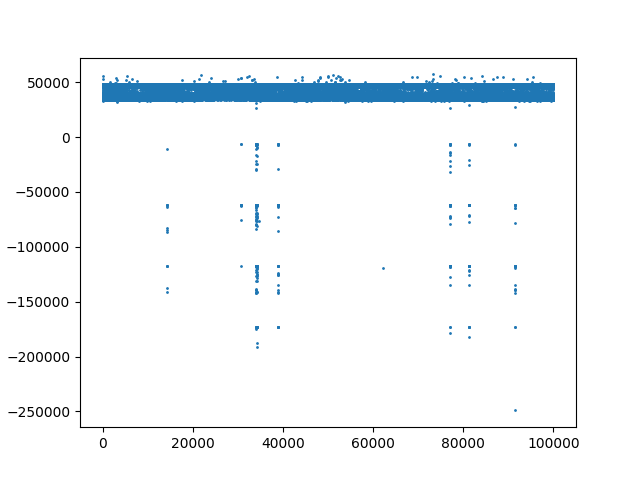

In [6]:
x = np.arange(len(latloaded))
fig,ax = plt.subplots(1,1)
ax.scatter(x,latloaded,s=1)

In [15]:
latloaded[34075]

-172966

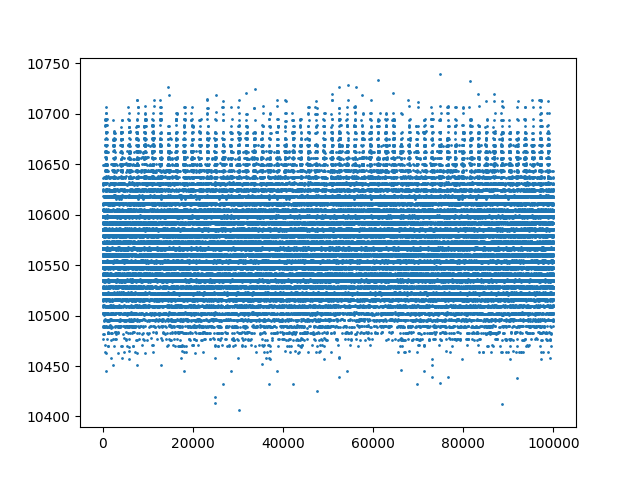

In [2]:
filename = 'lat_2249_100724'
latloaded = np.load(f'processed-data/2switches/{filename}.npy')

x = np.arange(len(latloaded))
fig,ax = plt.subplots(1,1)
ax.scatter(x,latloaded,s=1)

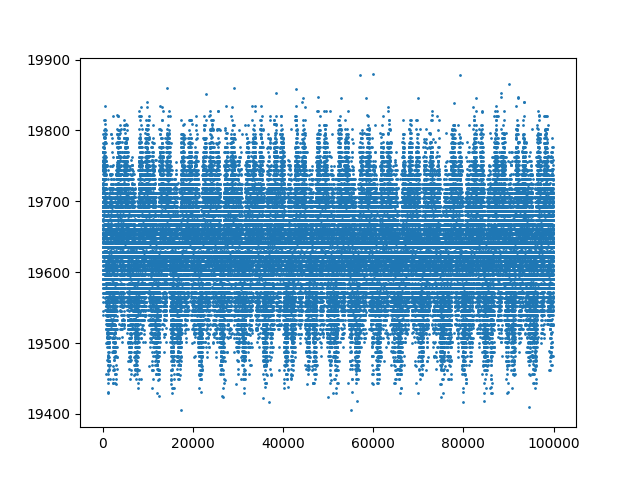

In [8]:
filename = 'lat_1723_080724'
latloaded = np.load(f'processed-data/4switches/{filename}.npy')[:-10]

x = np.arange(len(latloaded))
fig,ax = plt.subplots(1,1)
ax.scatter(x,latloaded,s=1)